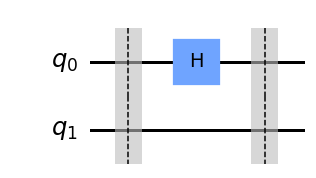

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

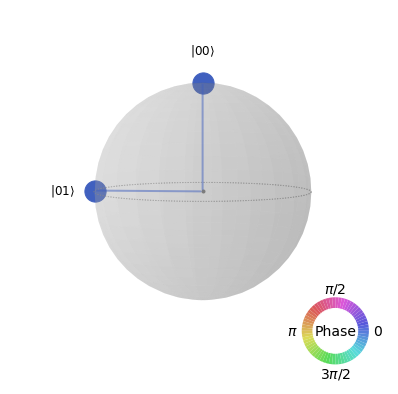

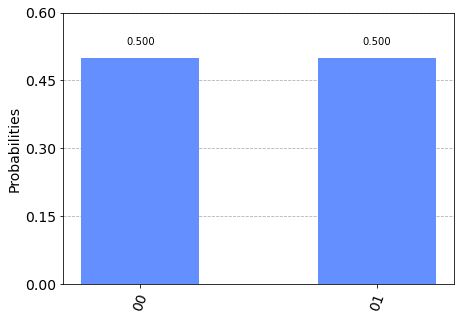

In [3]:
# entanglement.ipynb

# Cell 1 - Two qubits not entangled (single shot)

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import (
    Aer,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    assemble,
    execute,
)
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

backend = Aer.get_backend("aer_simulator")

# Initializing 2 qubits in the |0> state
qc = QuantumCircuit(2)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))

display(plot_state_qsphere(sv2))

plot_histogram(counts)

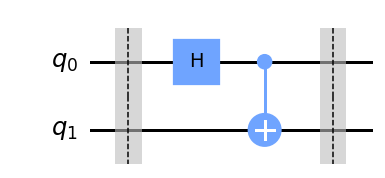

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

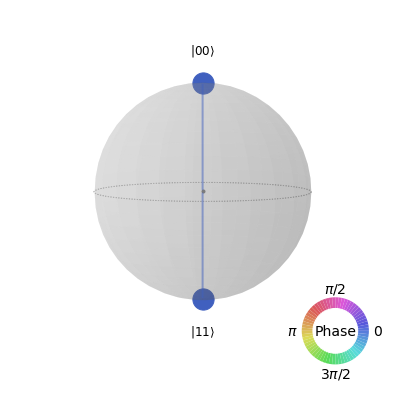

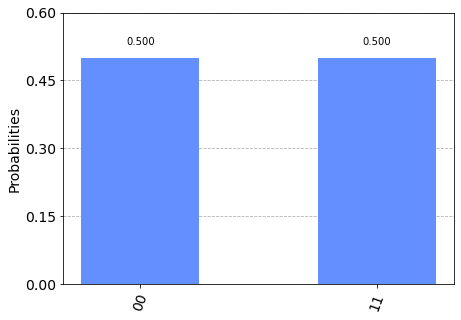

In [4]:
# Cell 2 - Two qubits entangled (single shot)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(2)
qc.save_statevector("sv1")
# Apply a Hadamard Gate to qubit 0
qc.h(0)
# Apply a controlled not gate to quibit 1, where 0 is the control 
qc.cx(0, 1)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))

display(plot_state_qsphere(sv2))

plot_histogram(counts)

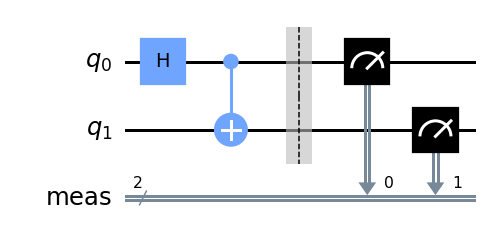

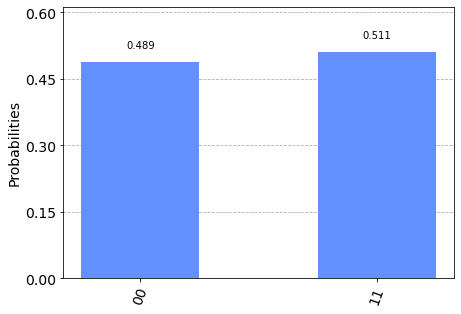

In [5]:
# Cell 3 - Two qubits entangled (multiple shots)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

result = execute(qc, backend, shots=1000).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
display(plot_histogram(counts))

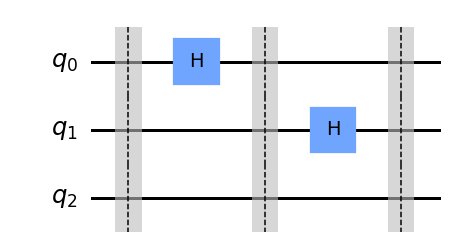

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

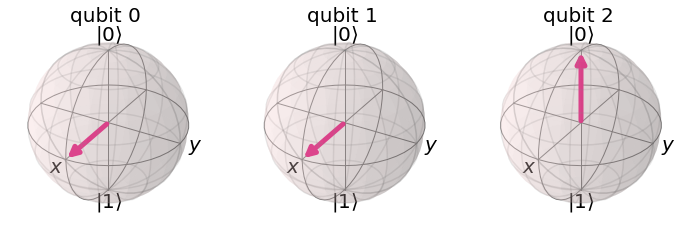

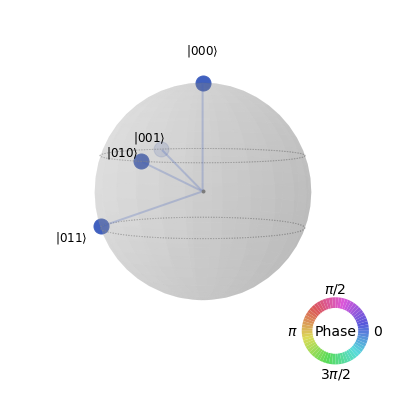

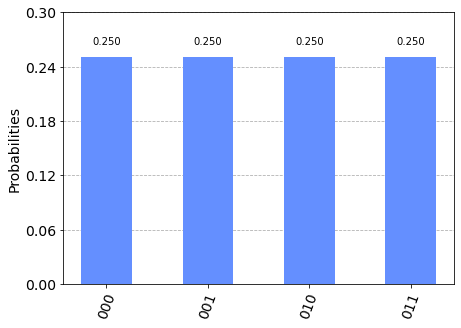

In [6]:
# Cell 4 - Three qubits not entangled (single shot)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(3)
qc.save_statevector("sv1")

qc.h(0)
qc.save_statevector("sv2")

qc.h(1)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))

display(plot_bloch_multivector(sv3))
display(plot_state_qsphere(sv3))
display(plot_histogram(counts))

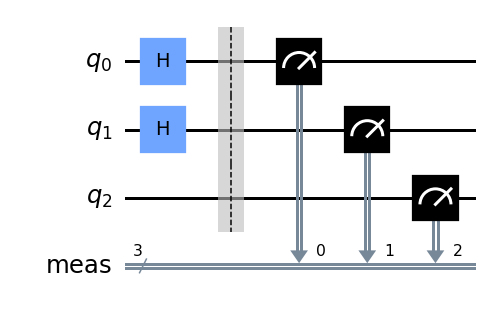

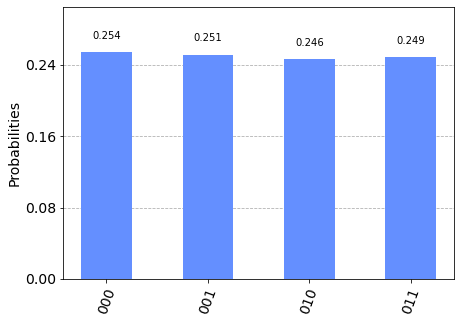

In [7]:
# Cell 5 - Three qubits not entangled (multiple shots)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.measure_all()

result = execute(qc, backend, shots=10_000).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
display(plot_histogram(counts))

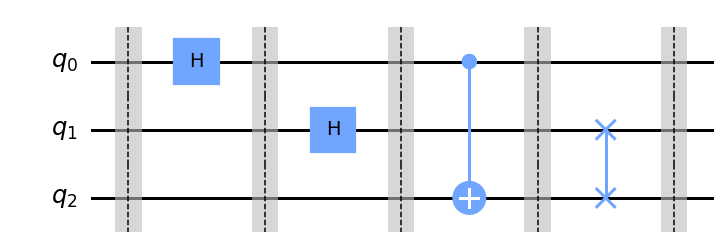

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

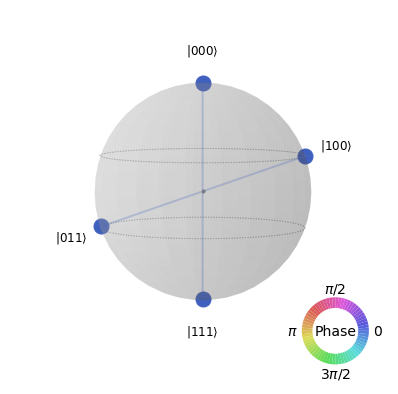

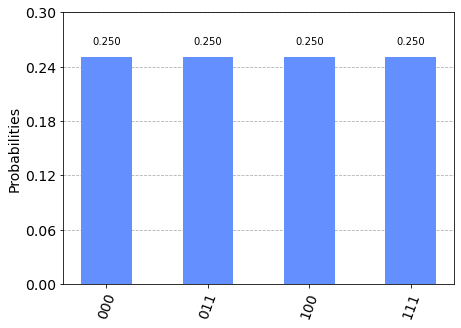

In [8]:
# Cell 6 - Three qubits entangled (single shot)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(3)
qc.save_statevector("sv1")

qc.h(0)
qc.save_statevector("sv2")

qc.h(1)
qc.save_statevector("sv3")

# Syntax for a controlled not gate
qc.cx(0, 2)
qc.save_statevector("sv4")

# Syntax for a swap gate
qc.swap(1, 2)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]
sv5 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))
display(array_to_latex(sv4, prefix="\\text{Statevector 4} = "))
display(array_to_latex(sv5, prefix="\\text{Statevector 5} = "))

display(plot_state_qsphere(sv5))
display(plot_histogram(counts))

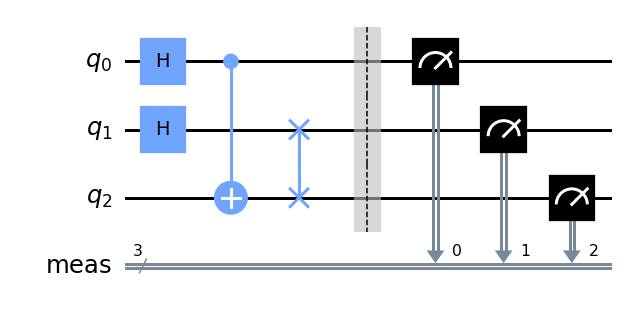

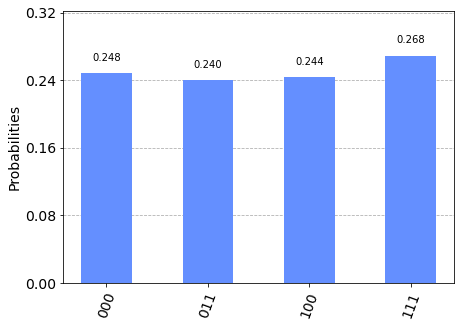

In [9]:
# Cell 7 - Three qubit circuit entangled (multiple shots)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(0, 2)
qc.swap(1, 2)
qc.measure_all()

result = execute(qc, backend, shots=1000).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
display(plot_histogram(counts))

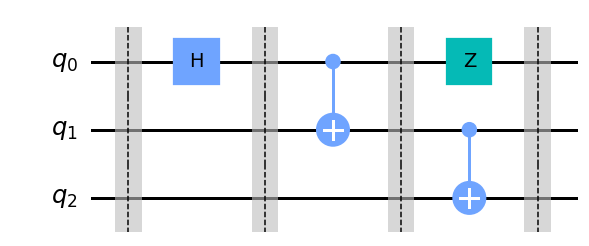

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

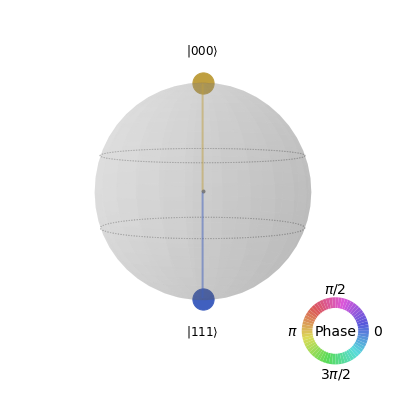

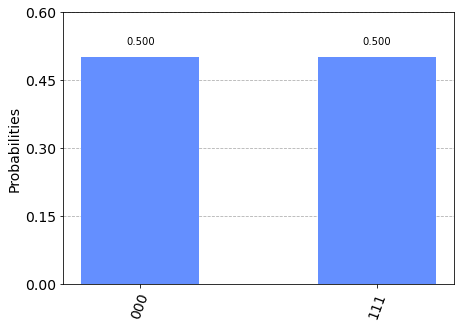

In [12]:
# Cell 8 - Greenberger–Horne–Zeilinger state (GHZ)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(3)
qc.save_statevector("sv1")

qc.h(0)
qc.save_statevector("sv2")

qc.cx(0, 1)
qc.save_statevector("sv3")

qc.cx(1, 2)
qc.z(0)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))
display(array_to_latex(sv4, prefix="\\text{Statevector 4} = "))

display(plot_state_qsphere(sv4))
display(plot_histogram(counts))

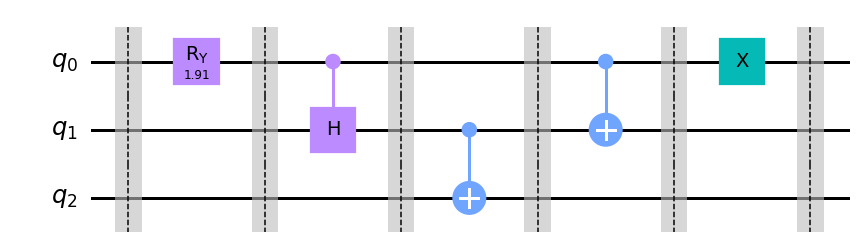

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

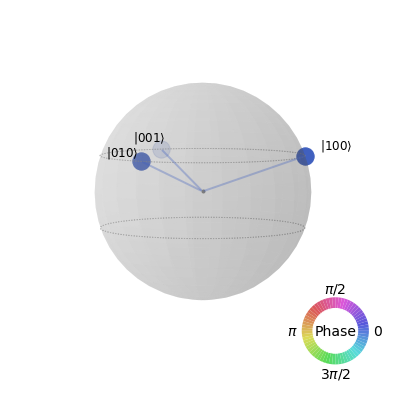

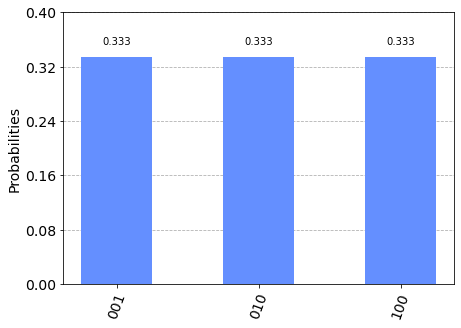

In [13]:
# Cell 9 - W State (Wolfgang Dur, 2002)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(3)
qc.save_statevector("sv1")

# Creating a partial rotation about the y 
qc.ry(2 * np.arccos(1 / np.sqrt(3)), 0)
qc.save_statevector("sv2")

# Syntax for a controlled Hadamard
qc.ch(0, 1)
qc.save_statevector("sv3")

qc.cx(1, 2)
qc.save_statevector("sv4")

qc.cx(0, 1)
qc.save_statevector("sv5")

qc.x(0)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]
sv5 = result.data(0)["sv5"]
sv6 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))
display(array_to_latex(sv4, prefix="\\text{Statevector 4} = "))
display(array_to_latex(sv5, prefix="\\text{Statevector 5} = "))
display(array_to_latex(sv6, prefix="\\text{Statevector 6} = "))

display(plot_state_qsphere(sv6))
display(plot_histogram(counts))